In [1]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

/home/elos/Project/Deep_Learning/Object Detection/ATM Screen Detection/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/elos/Project/Deep_Learning/Object Detection/ATM Screen Detection/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/elos/Project/Deep_Learning/Object Detection/ATM Screen Detection/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (typ

In [2]:
from yolo.frontend import create_yolo

# 1. create yolo instance
yolo_detector = create_yolo("ResNet50", ["Screen"], 416)








__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 208, 208, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max

In [4]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

DEFAULT_WEIGHT_FILE = os.path.join("svhn", "weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in svhn/weights.h5


In [15]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join("datasets", "test_image")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.jpeg"), os.path.join(DEFAULT_IMAGE_FOLDER, "1.jpeg")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


[[2399 1769 4251 2808]
 [5729 2330 7921 3265]]
2-boxes are detected.


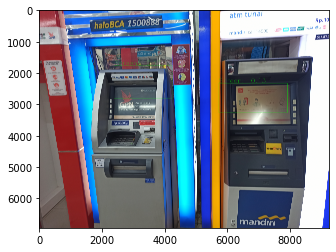

[[ 960 1118 1568 1675]]
1-boxes are detected.


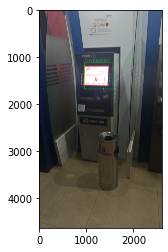

In [13]:
# 4. Predict digit region

THRESHOLD = 0.09
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)
    print(boxes)
    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["Screen"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()
